In [12]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import sys
import numpy as np

sys.path.insert(0, str(Path.cwd() / 'preparation/'))

import data_loader
import preprocess

In [13]:
sample = data_loader.load_h5_as_df(Path('../../csgo_dataset/processed_files/renegades-vs-g2-m1-inferno.h5'), False)
cs = data_loader.load_csv_as_df(Path('../../csgo_dataset/parsed_files/renegades-vs-g2-m1-inferno.csv'))
only_pos_sample = sample[data_loader.get_feature_column_names('PositionX') + data_loader.get_feature_column_names('PositionY')]

In [14]:
tick = 10330.0

print(tick)

10330.0


In [15]:
#sample.loc[tick-100:tick+100,data_loader.get_feature_column_names('PositionX')[0]]


In [16]:
print(only_pos_sample.columns)

all_aim_columns = list(np.array([data_loader.get_feature_column_names(f'AimOnEnemy_{i}') for i in range(5)]).flatten())

sample.loc[tick-50:tick+50, all_aim_columns]


Index(['f_0_PositionX', 'f_1_PositionX', 'f_2_PositionX', 'f_3_PositionX',
       'f_4_PositionX', 'f_5_PositionX', 'f_6_PositionX', 'f_7_PositionX',
       'f_8_PositionX', 'f_9_PositionX', 'f_0_PositionY', 'f_1_PositionY',
       'f_2_PositionY', 'f_3_PositionY', 'f_4_PositionY', 'f_5_PositionY',
       'f_6_PositionY', 'f_7_PositionY', 'f_8_PositionY', 'f_9_PositionY'],
      dtype='object')


,f_0_AimOnEnemy_0,f_1_AimOnEnemy_0,f_2_AimOnEnemy_0,f_3_AimOnEnemy_0,f_4_AimOnEnemy_0,f_5_AimOnEnemy_0,f_6_AimOnEnemy_0,f_7_AimOnEnemy_0,f_8_AimOnEnemy_0,f_9_AimOnEnemy_0,...,f_0_AimOnEnemy_4,f_1_AimOnEnemy_4,f_2_AimOnEnemy_4,f_3_AimOnEnemy_4,f_4_AimOnEnemy_4,f_5_AimOnEnemy_4,f_6_AimOnEnemy_4,f_7_AimOnEnemy_4,f_8_AimOnEnemy_4,f_9_AimOnEnemy_4
Tick,,,,,,,,,,,,,,,,,,,,,
10282.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10298.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10314.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10330.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10346.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10362.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10378.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [17]:
print(only_pos_sample.columns)

directions = preprocess.all_player_eyeAngles_to_direction_vec3(cs,tick)
positions = preprocess.all_player_position_to_vec3(cs,tick)

raw_positions_x = sample.loc[tick, data_loader.get_feature_column_names('PositionX')].to_numpy()
raw_positions_y = sample.loc[tick, data_loader.get_feature_column_names('PositionY')].to_numpy()

positions_x = [a.components()[0] for a in positions]
positions_y = [a.components()[1] for a in positions]
positions_z = [a.components()[2] for a in positions]

end_positions_x = [a.__add__(b.__mul__(3000)).components()[0] for a,b in zip(positions,directions)]
end_positions_y = [a.__add__(b.__mul__(3000)).components()[1] for a,b in zip(positions,directions)]
end_positions_z = [a.__add__(b.__mul__(100)).components()[2] for a,b in zip(positions,directions)]

#print("POSX:", positions_x, len(positions_x))
#print("POSY:",positions_y,len(positions_y))
#print("ENDPOSX:",end_positions_x, len(end_positions_x))
#print("ENDPOS<:",end_positions_y, len(end_positions_y))


#print(raw_positions_x)

Index(['f_0_PositionX', 'f_1_PositionX', 'f_2_PositionX', 'f_3_PositionX',
       'f_4_PositionX', 'f_5_PositionX', 'f_6_PositionX', 'f_7_PositionX',
       'f_8_PositionX', 'f_9_PositionX', 'f_0_PositionY', 'f_1_PositionY',
       'f_2_PositionY', 'f_3_PositionY', 'f_4_PositionY', 'f_5_PositionY',
       'f_6_PositionY', 'f_7_PositionY', 'f_8_PositionY', 'f_9_PositionY'],
      dtype='object')


-1708.0 2661.5173
-787.9958 3591.9998
Tick: 10330.0


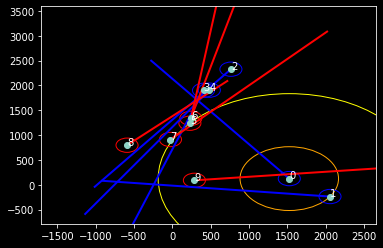

In [21]:
x,y = positions_x, positions_y
#x,y = raw_positions_x, raw_positions_y
plt.plot(x, y, "o")
ax = plt.gca()

x_min, x_max = np.amin(only_pos_sample[data_loader.get_feature_column_names('PositionX')].min()), np.amax(only_pos_sample[data_loader.get_feature_column_names('PositionX')].max())
y_min, y_max = np.amin(only_pos_sample[data_loader.get_feature_column_names('PositionY')].min()), np.amax(only_pos_sample[data_loader.get_feature_column_names('PositionY')].max())

print(x_min,x_max)
print(y_min,y_max)
print("Tick: " + str(tick))

dst_player = 0

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
lines = []
for i, (pos_x, pos_y, end_pos_x, end_pos_y) in enumerate(zip(positions_x,positions_y,end_positions_x,end_positions_y)):
    lines.append([(pos_x, pos_y), (end_pos_x, end_pos_y)])
    # plot circles using the RGBA colors
    col = 'red' if i > 4 else 'blue'

    if i == dst_player:
        circle_distance = plt.Circle((pos_x,pos_y), cs.loc[tick,data_loader.get_feature_column_names('DistanceToEnemy_0')[dst_player]],color='yellow',fill=False)
        circle_distance_ally = plt.Circle((pos_x,pos_y), cs.loc[tick,data_loader.get_feature_column_names('DistanceToAlly_1')[dst_player]],color='orange',fill=False)
        ax.add_artist(circle_distance)
        ax.add_artist(circle_distance_ally)

    circle = plt.Circle((pos_x, pos_y), 144, color=col, fill=False)
    ax.add_artist(circle)
    ax.text(pos_x, pos_y, i)



lc = LineCollection(lines[:5], color=["blue"], lw=2)
lc2 = LineCollection(lines[5:], color=["red"], lw=2)

plt.gca().add_collection(lc)
plt.gca().add_collection(lc2)

plt.show()

In [8]:
print(list(map(lambda v: v.components()[2], directions)))

[0.02866234002795771, 0.0, 0.11946040260356994, 0.04648203831192451, 0.07279962983635167, 0.015435068733790197, -0.04600318213091439, -0.04360874485745806, -0.7858033982357098, 0.0885670651421487]


In [9]:
chunk = data_loader.load_h5_as_df("/home/hueter/csgo_dataset/training_data/inferno/data_chunk_0_0.h5", False)

In [10]:
chunk.filter(like="AimOn").columns

Index(['f_0_AimOnEnemy_0', 'f_1_AimOnEnemy_0', 'f_2_AimOnEnemy_0',
       'f_3_AimOnEnemy_0', 'f_4_AimOnEnemy_0', 'f_5_AimOnEnemy_0',
       'f_6_AimOnEnemy_0', 'f_7_AimOnEnemy_0', 'f_8_AimOnEnemy_0',
       'f_9_AimOnEnemy_0', 'f_0_AimOnEnemy_1', 'f_1_AimOnEnemy_1',
       'f_2_AimOnEnemy_1', 'f_3_AimOnEnemy_1', 'f_4_AimOnEnemy_1',
       'f_5_AimOnEnemy_1', 'f_6_AimOnEnemy_1', 'f_7_AimOnEnemy_1',
       'f_8_AimOnEnemy_1', 'f_9_AimOnEnemy_1', 'f_0_AimOnEnemy_2',
       'f_1_AimOnEnemy_2', 'f_2_AimOnEnemy_2', 'f_3_AimOnEnemy_2',
       'f_4_AimOnEnemy_2', 'f_5_AimOnEnemy_2', 'f_6_AimOnEnemy_2',
       'f_7_AimOnEnemy_2', 'f_8_AimOnEnemy_2', 'f_9_AimOnEnemy_2',
       'f_0_AimOnEnemy_3', 'f_1_AimOnEnemy_3', 'f_2_AimOnEnemy_3',
       'f_3_AimOnEnemy_3', 'f_4_AimOnEnemy_3', 'f_5_AimOnEnemy_3',
       'f_6_AimOnEnemy_3', 'f_7_AimOnEnemy_3', 'f_8_AimOnEnemy_3',
       'f_9_AimOnEnemy_3', 'f_0_AimOnEnemy_4', 'f_1_AimOnEnemy_4',
       'f_2_AimOnEnemy_4', 'f_3_AimOnEnemy_4', 'f_4_AimOnEnemy

In [11]:
alist = data_loader.get_column_names_from_features_set(
            "training_all")
print(alist, len(alist))

['f_0_IsAlive', 'f_1_IsAlive', 'f_2_IsAlive', 'f_3_IsAlive', 'f_4_IsAlive', 'f_5_IsAlive', 'f_6_IsAlive', 'f_7_IsAlive', 'f_8_IsAlive', 'f_9_IsAlive', 'f_0_Health', 'f_1_Health', 'f_2_Health', 'f_3_Health', 'f_4_Health', 'f_5_Health', 'f_6_Health', 'f_7_Health', 'f_8_Health', 'f_9_Health', 'f_0_Armor', 'f_1_Armor', 'f_2_Armor', 'f_3_Armor', 'f_4_Armor', 'f_5_Armor', 'f_6_Armor', 'f_7_Armor', 'f_8_Armor', 'f_9_Armor', 'f_0_EquipmentValue', 'f_1_EquipmentValue', 'f_2_EquipmentValue', 'f_3_EquipmentValue', 'f_4_EquipmentValue', 'f_5_EquipmentValue', 'f_6_EquipmentValue', 'f_7_EquipmentValue', 'f_8_EquipmentValue', 'f_9_EquipmentValue', 'f_0_PositionX', 'f_1_PositionX', 'f_2_PositionX', 'f_3_PositionX', 'f_4_PositionX', 'f_5_PositionX', 'f_6_PositionX', 'f_7_PositionX', 'f_8_PositionX', 'f_9_PositionX', 'f_0_PositionY', 'f_1_PositionY', 'f_2_PositionY', 'f_3_PositionY', 'f_4_PositionY', 'f_5_PositionY', 'f_6_PositionY', 'f_7_PositionY', 'f_8_PositionY', 'f_9_PositionY', 'f_0_PositionZ', 'f

In [23]:
spheres = preprocess.generate_player_spheres(positions,144)

hits = preprocess.get_player_raycast_hits(positions[8], directions[8], spheres)

print(hits)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
